<a href="https://colab.research.google.com/github/Amfant/reimagined-broccoli/blob/Project-1/(Phoenix)_Week_02_NASA_Exoplanet_Archive_data_explorer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt
import pandas as pd
import astropy.io.ascii
from astropy.io import ascii

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = '/content/drive/My Drive/Colab Notebooks/PS_2025.01.21_10.43.08.csv'


In [ ]:
tab = ascii.read(file_path)
print(tab)

        pl_name                hostname       default_flag ... rowupdate  pl_pubdate releasedate
----------------------- --------------------- ------------ ... ---------- ---------- -----------
               11 Com b                11 Com            1 ... 2023-09-19    2023-08  2023-09-19
               11 UMi b                11 UMi            1 ... 2018-09-04    2017-03  2018-09-06
               14 And b                14 And            1 ... 2023-09-19    2023-08  2023-09-19
               14 Her b                14 Her            1 ... 2023-06-12    2022-09  2023-06-12
             16 Cyg B b              16 Cyg B            1 ... 2018-09-04    2017-03  2018-09-06
               17 Sco b                17 Sco            1 ... 2021-10-25    2020-12  2021-10-25
               18 Del b                18 Del            1 ... 2023-09-19    2023-08  2023-09-19
1RXS J160929.1-210524 b 1RXS J160929.1-210524            1 ... 2015-04-01    2015-03  2015-04-01
               24 Boo b       

In [ ]:
import os
print(os.listdir('/content/drive/My Drive/Colab Notebooks'))

['ASTRON 5205_first_coding_session.ipynb', 'PS_2025.01.16_06.39.23.csv', 'PS_2025.01.21_10.43.08.csv', 'Week_02_NASA_Exoplanet_Archive_data_explorer.ipynb']


In [ ]:
print(tab.colnames)

['pl_name', 'hostname', 'default_flag', 'sy_snum', 'sy_pnum', 'discoverymethod', 'disc_year', 'disc_facility', 'soltype', 'pl_controv_flag', 'pl_refname', 'pl_orbper', 'pl_orbpererr1', 'pl_orbpererr2', 'pl_orbperlim', 'pl_orbsmax', 'pl_orbsmaxerr1', 'pl_orbsmaxerr2', 'pl_orbsmaxlim', 'pl_rade', 'pl_radeerr1', 'pl_radeerr2', 'pl_radelim', 'pl_radj', 'pl_radjerr1', 'pl_radjerr2', 'pl_radjlim', 'pl_bmasse', 'pl_bmasseerr1', 'pl_bmasseerr2', 'pl_bmasselim', 'pl_bmassj', 'pl_bmassjerr1', 'pl_bmassjerr2', 'pl_bmassjlim', 'pl_bmassprov', 'pl_orbeccen', 'pl_orbeccenerr1', 'pl_orbeccenerr2', 'pl_orbeccenlim', 'pl_insol', 'pl_insolerr1', 'pl_insolerr2', 'pl_insollim', 'pl_eqt', 'pl_eqterr1', 'pl_eqterr2', 'pl_eqtlim', 'ttv_flag', 'st_refname', 'st_spectype', 'st_teff', 'st_tefferr1', 'st_tefferr2', 'st_tefflim', 'st_rad', 'st_raderr1', 'st_raderr2', 'st_radlim', 'st_mass', 'st_masserr1', 'st_masserr2', 'st_masslim', 'st_met', 'st_meterr1', 'st_meterr2', 'st_metlim', 'st_metratio', 'st_logg', 'st

Text(0, 0.5, 'Radius [R$_{Jupiter}$]')

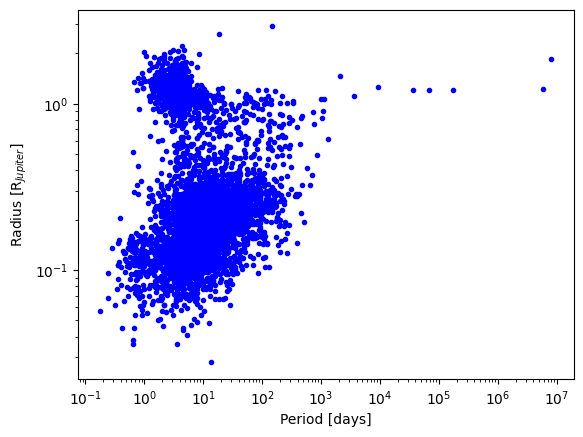

In [ ]:
plt.plot(tab["pl_orbper"], tab["pl_radj"], "b.")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Period [days]")
plt.ylabel(r"Radius [R$_{Jupiter}$]")

## 1, How about Mass-Period plot, Mass-Semi-major axis plot, etc? How different are they and why?


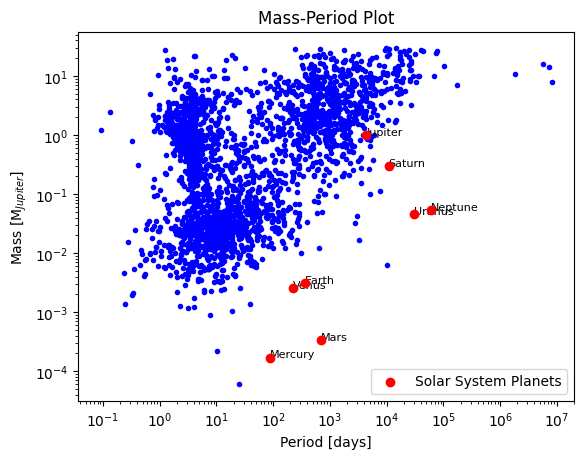

In [42]:
plt.plot(tab["pl_orbper"], tab["pl_bmassj"], "b.")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Period [days]")
plt.ylabel(r"Mass [M$_{Jupiter}$]")
plt.title("Mass-Period Plot")

solar_system_periods = [87.97, 224.7, 365.25, 687, 4332.59, 10759.22, 30687.15, 60190.03]
solar_system_masses = [0.00017, 0.00256, 0.00315, 0.00034, 1.00, 0.299, 0.046, 0.054]
solar_system_names = ["Mercury", "Venus", "Earth", "Mars", "Jupiter", "Saturn", "Uranus", "Neptune"]


plt.scatter(solar_system_periods, solar_system_masses, color="red", label="Solar System Planets", zorder=5)
for i, name in enumerate(solar_system_names):
    plt.text(solar_system_periods[i], solar_system_masses[i], name, fontsize=8, color="black")

plt.legend()
plt.show()

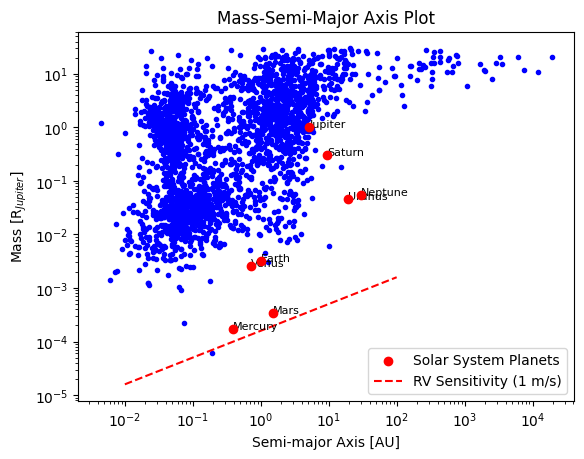

In [53]:
plt.plot(tab["pl_orbsmax"], tab["pl_bmassj"], "b.")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Semi-major Axis [AU]")
plt.ylabel(r"Mass [R$_{Jupiter}$]")
plt.title("Mass-Semi-Major Axis Plot")

solar_system_axes = [0.39, 0.72, 1.00, 1.52, 5.20, 9.58, 19.22, 30.05]
solar_system_masses = [0.00017, 0.00256, 0.00315, 0.00034, 1.00, 0.299, 0.046, 0.054]
solar_system_names = ["Mercury", "Venus", "Earth", "Mars", "Jupiter", "Saturn", "Uranus", "Neptune"]

# Scatter plot with labels for planets
plt.scatter(solar_system_axes, solar_system_masses, color="red", label="Solar System Planets", zorder=5)
for i, name in enumerate(solar_system_names):
    plt.text(solar_system_axes[i], solar_system_masses[i], name, fontsize=8, color="black")

#Graphing sensitivity line
G = 39.5  # AU^3 / (Msun * year^2)
stellar_mass = 1  # Msun
inclination = np.pi / 2  # Edge-on (sin(i) = 1)

# Semi-major axis (log-spaced)
a = np.logspace(-2, 2, 100)  # Semi-major axis in AU

# RV Sensitivity (K_min = 1 m/s, example sensitivity)
K_min = 1e-3  # Minimum RV amplitude (1 m/s in AU/year)
m_p_sensitivity = K_min * stellar_mass * np.sqrt(a / G)  # Rearranged formula for m_p

# Plot sensitivity line
plt.plot(a, m_p_sensitivity, 'r--', label='RV Sensitivity (1 m/s)')
plt.xscale('log')
plt.yscale('log')


plt.legend()
plt.show()

Text(0.5, 0, 'Semi-major Axis')

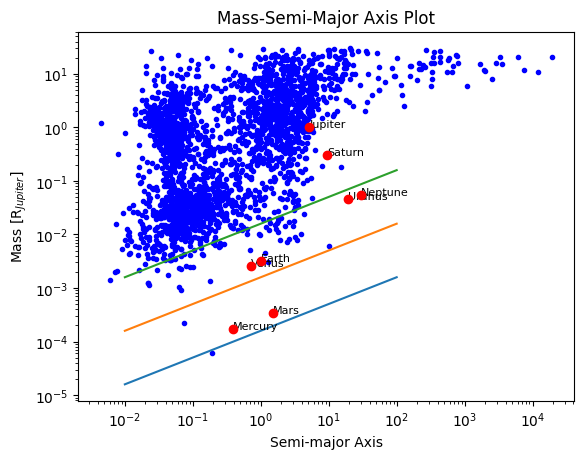

In [55]:
plt.plot(tab["pl_orbsmax"], tab["pl_bmassj"], "b.")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Semi-major Axis [AU]")
plt.ylabel(r"Mass [R$_{Jupiter}$]")
plt.title("Mass-Semi-Major Axis Plot")

solar_system_axes = [0.39, 0.72, 1.00, 1.52, 5.20, 9.58, 19.22, 30.05]
solar_system_masses = [0.00017, 0.00256, 0.00315, 0.00034, 1.00, 0.299, 0.046, 0.054]
solar_system_names = ["Mercury", "Venus", "Earth", "Mars", "Jupiter", "Saturn", "Uranus", "Neptune"]

# Scatter plot with labels for planets
plt.scatter(solar_system_axes, solar_system_masses, color="red", label="Solar System Planets", zorder=5)
for i, name in enumerate(solar_system_names):
    plt.text(solar_system_axes[i], solar_system_masses[i], name, fontsize=8, color="black")

G= 39.5  # Gravitational constant in AU^3 / (M_sun * year^2)
stellar_mass = 1  # Stellar mass in M_sun

# Semi-major axis (log-spaced)
a = np.logspace(-2, 2, 100)  # Semi-major axis in AU

# Example Radial Velocity Amplitude (K) in AU/year
K_values = [1e-3, 1e-2, 1e-1]  # Example K values: 1 m/s, 10 m/s, 100 m/s

# Compute m_p for each K
for K in K_values:
    m_p = K * stellar_mass**(3/2) * np.sqrt(a / G)  # Mass in M_Jupiter
    plt.plot(a, m_p, label=f'K = {K * 1000:.1f} m/s')

# Plot
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Semi-major Axis")

## Graphing sensitivity line


The Mass-Period Plot tends to compress the data for longer orbital periods because periods increase faster compared to semi-major axes for the same planet-star system.

The Mass-Semi-Major Axis Plot provides a more “spread-out” view of the data because semi-major axis scales linearly with distance.

## 2, Overplot solar system planets on the above plot?

## 3, Research on the state-of-the-art performance of each detection technique and overplot the sensitivity line. An example of RV is given below.

## $K = \frac{m_p}{m_\ast}\cdot\sqrt{\frac{Gm_\ast}{a}}\cdot\sin i$

## Assuming an edge-on orbit, for which $i$ is 90 degree, rearrange the equation to be:

## $m_p = K \cdot m_\ast \cdot \sqrt{\frac{a}{Gm_\ast}}$

## For a K value of 0.5 m/s, which is the state-of-the-art performance, the mass sensitivity is as follows for a range of semi major axis $a$, assuming 0.5 solar mass:

In [56]:
import astropy.constants as ac
import astropy.units as u

In [57]:
sma_arr = 10.0**(np.arange(5)-2) * u.AU

m_p_arr = 0.5 * u.meter / u.second * 0.5 * u.solMass * np.sqrt(sma_arr / ac.G / (0.5 * u.solMass))



Text(0, 0.5, 'Mass [R$_{Earth}$]')

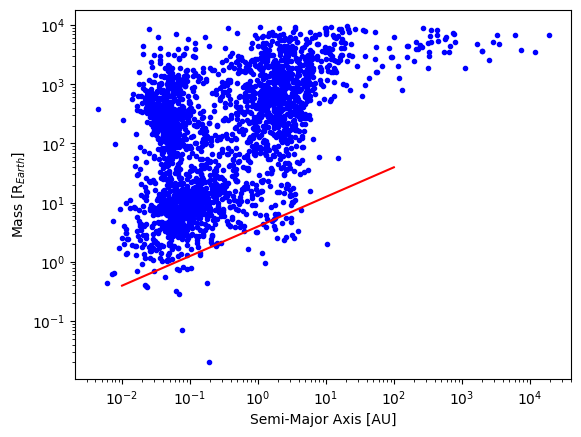

In [58]:
plt.plot(tab["pl_orbsmax"], tab["pl_bmasse"], "b.")
plt.plot(sma_arr.value, m_p_arr.decompose().to(u.earthMass), color="red")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Semi-Major Axis [AU]")
plt.ylabel(r"Mass [R$_{Earth}$]")

## You may think about the conversin between mass and radius  when considering the sensitivity of other detection techniques.

Radial velocity, with a sensitivity of 0.5 m/s, is best for detecting high-mass planets, especially gas giants, across various distances but struggles with low-mass planets farther out. Transit photometry, focused on radius rather than mass, excels at detecting small planets like super-Earths around bright stars but is less effective for faint stars or distant planets. The mass-radius relationship depends on composition, with gas giants showing a weaker correlation and rocky planets a stronger one. Combining RV and transit methods provides a more complete view of planetary systems by overcoming the limitations of each technique.